# Import Libraries

In [ ]:
import tweepy as tp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Setup Tweepy and Gather Data

In [ ]:
#Setting up the Twitter API key
consumer_key = 'bdNCNT5p8q9bOyq0XbgW55kuD'
consumer_secret = '3NrStuLAOwLv5Xq7BFeVNBBZW8kjTwf282S9z8zjlAEwtAkKeH'
access_token = '1478395338943836160-otxgJpUhEwnovb0YkaQMsZmpMGTSjZ'
access_token_secret = 'weFQAY9E6OEzyjbjtaiuuVErrJWNHgozdqBhdZDvJtmpP'

In [ ]:
#Authenticate via Tweepy 
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth, wait_on_rate_limit=True)

In [ ]:
#Generate the neccessary Twitter data
#This is limited by the Twitter API (can only retrieve tweets 7 days into the past), may want to try Snscrape library
hashtag = '#LostArk -filter:retweets'
query = tp.Cursor(api.search, q=hashtag, lang='en').items(1000)
tweets = [{'tweet': tweet.text, 'timestamp': tweet.created_at} for tweet in query]
print(tweets)

[{'tweet': '🔴🦊👀\n[ENVtuber] April Fools | Heater Time | Elzowin Server | Lost Ark Guildie night\n\n https://t.co/aUQ5Qgjh4e… https://t.co/NyjVhjbkIp', 'timestamp': datetime.datetime(2022, 4, 2, 1, 22, 25)}, {'tweet': "Reached iLvL 600, now focusing on the main story. Also, new skin, couldn't resist any longer. \n\nGame: @playlostark… https://t.co/tTwbSRqGMX", 'timestamp': datetime.datetime(2022, 4, 2, 1, 11, 26)}, {'tweet': 'Woot. #LostArk https://t.co/SugVse2YZM', 'timestamp': datetime.datetime(2022, 4, 2, 1, 3, 13)}, {'tweet': 'These were some of my favorites to face in the Anikka tournament 😍 😊! \n#PlayLostArk #LostArkMMO #LostArk https://t.co/IajMtees7g', 'timestamp': datetime.datetime(2022, 4, 2, 1, 0, 23)}, {'tweet': "Join me playing Lost Duc (Ark)! I'm going to play til I reach Level 50 today! Come chat and hang out with me tonigh… https://t.co/iAvihBOtiy", 'timestamp': datetime.datetime(2022, 4, 2, 0, 58, 52)}, {'tweet': 'Lost Ark: Quests and grinding to Level 600 - very chill 

# Data Transformations


In [ ]:
#Transform the data
df = pd.DataFrame.from_dict(tweets)
df

,tweet,timestamp
0,🔴🦊👀\n[ENVtuber] April Fools | Heater Time | El...,2022-04-02 01:22:25
1,"Reached iLvL 600, now focusing on the main sto...",2022-04-02 01:11:26
2,Woot. #LostArk https://t.co/SugVse2YZM,2022-04-02 01:03:13
3,These were some of my favorites to face in the...,2022-04-02 01:00:23
4,Join me playing Lost Duc (Ark)! I'm going to p...,2022-04-02 00:58:52
...,...,...
995,sorry guys my internet pooped on me! thx to @m...,2022-03-29 06:46:43
996,A purple dinosaur spotted out in the wild ! \n...,2022-03-29 06:35:37
997,Had a great stream love meeting new people in ...,2022-03-29 06:22:22
998,Rat-keteer at it again!\n\n Lost Ark with my p...,2022-03-29 06:08:54


In [ ]:
df.shape

(1000, 2)

In [ ]:
#Apply a polarity value to each tweet 
from textblob import TextBlob

df['polarity'] = df['tweet'].apply(lambda x : TextBlob(x).sentiment.polarity)
df.head()

,tweet,timestamp,polarity
0,🔴🦊👀\n[ENVtuber] April Fools | Heater Time | El...,2022-04-02 01:22:25,0.000000
1,"Reached iLvL 600, now focusing on the main sto...",2022-04-02 01:11:26,-0.032323
2,Woot. #LostArk https://t.co/SugVse2YZM,2022-04-02 01:03:13,0.000000
3,These were some of my favorites to face in the...,2022-04-02 01:00:23,0.000000
4,Join me playing Lost Duc (Ark)! I'm going to p...,2022-04-02 00:58:52,0.000000


In [ ]:
#Just a check to see if negative polarity exists
df.query('polarity < 0').head()

,tweet,timestamp,polarity
1,"Reached iLvL 600, now focusing on the main sto...",2022-04-02 01:11:26,-0.032323
8,"me, realizing i have to quest now that i spent...",2022-04-02 00:17:52,-0.100000
11,"Slight change of plans, gonna do some #telltal...",2022-04-02 00:00:34,-0.166667
15,I'm a little late (this is my life) but we're ...,2022-04-01 23:19:02,-0.146378
19,@OdinCasts breaks down the action and stories ...,2022-04-01 23:03:03,-0.027778


In [ ]:
def rating(polarity):
  if polarity == 0:
    return 0
  elif polarity > 0:
    return 1
  else:
    return -1 

In [ ]:
#Apply a rating to each tweet based on the polarity
df['rating'] = df['polarity'].apply(lambda x: rating(x))
df.head()

,tweet,timestamp,polarity,rating
0,🔴🦊👀\n[ENVtuber] April Fools | Heater Time | El...,2022-04-02 01:22:25,0.000000,0
1,"Reached iLvL 600, now focusing on the main sto...",2022-04-02 01:11:26,-0.032323,-1
2,Woot. #LostArk https://t.co/SugVse2YZM,2022-04-02 01:03:13,0.000000,0
3,These were some of my favorites to face in the...,2022-04-02 01:00:23,0.000000,0
4,Join me playing Lost Duc (Ark)! I'm going to p...,2022-04-02 00:58:52,0.000000,0


# Data Cleaning

In [ ]:
#Remove all duplicates, in this case the retweets 
# df = df[~df['tweet'].str.contains('RT')]
# df.shape

In [ ]:
#Import required libraries
import re
import nltk
from textblob import Word

In [ ]:
#Setup the english stopwords library
#Forked from: https://youtu.be/zwR6M5zpnWs?t=936
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

stop_words = stopwords.words('english')
#custom_stopwords = ['#LostArk', '#LostArkMMO']
#stop_words.extend(custom_stopwords)
stop_words.remove('not')      #We are considering negations: ['not good', 'not bad', ...]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Remove all emojis: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emojis(tweet):
  emoji_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', tweet)


In [ ]:
def clean_tweets(tweet):
  cleaned_tweet = tweet
  cleaned_tweet.replace('[\w\s]', '')                                                           #remove punctuation
  cleaned_tweet = re.sub(r'http\S+', '', cleaned_tweet)                                         #remove URLS
  cleaned_tweet = re.sub('@[A-Za-z0-9_]+','', cleaned_tweet)                                    #remove Twitter mentions
  cleaned_tweet = re.sub('#[A-Za-z0-9_]+','', cleaned_tweet)                                    #remove hashtags
  cleaned_tweet = " ".join(word for word in cleaned_tweet.split() if word not in stop_words)    #remove stopwords
  cleaned_tweet = " ".join(Word(word).lemmatize() for word in cleaned_tweet.split())            #lemmatize all words
  cleaned_tweet = remove_emojis(cleaned_tweet)                                                  #remove emojis
  return cleaned_tweet

df['cleaned_tweet'] = df['tweet'].apply(lambda x: clean_tweets(x))
df.head()

,tweet,timestamp,polarity,rating,cleaned_tweet
0,🔴🦊👀\n[ENVtuber] April Fools | Heater Time | El...,2022-04-02 01:22:25,0.000000,0,🦊 [ENVtuber] April Fools | Heater Time | Elzow...
1,"Reached iLvL 600, now focusing on the main sto...",2022-04-02 01:11:26,-0.032323,-1,"Reached iLvL 600, focusing main story. Also, n..."
2,Woot. #LostArk https://t.co/SugVse2YZM,2022-04-02 01:03:13,0.000000,0,Woot.
3,These were some of my favorites to face in the...,2022-04-02 01:00:23,0.000000,0,These favorite face Anikka tournament !
4,Join me playing Lost Duc (Ark)! I'm going to p...,2022-04-02 00:58:52,0.000000,0,Join playing Lost Duc (Ark)! I'm going play ti...


# Setup the Training and Testing Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = df['cleaned_tweet']
y = df['rating']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

vec = CountVectorizer()                        #Vectorize the tweets, such that each word is modeled by a value (feature extraction for text)
X_train_cv = vec.fit_transform(X_train).toarray()
X_valid_cv = vec.transform(X_valid).toarray()
X_test_cv = vec.transform(X_test).toarray()

# Fit a Classification Model

Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Fit the model using the training set
model = MultinomialNB()      #These are the default parameters
model.fit(X_train_cv, y_train)
print("MultinomialNB Base Train Accuracy:", model.score(X_train_cv, y_train))

preds = model.predict(X_test_cv)
print("MultinomialNB Base Test Accuracy:", metrics.accuracy_score(y_test, preds)) #0.672

MultinomialNB Base Train Accuracy: 0.9173333333333333
MultinomialNB Base Test Accuracy: 0.786


In [ ]:
from sklearn.model_selection import GridSearchCV

#Cross-validation 
alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
params = {'alpha': alphas, 
          'fit_prior' : [True, False],
          'class_prior' : [None, [0.4, 0.3, 0.3], [0.3, 0.4, 0.3], [0.3, 0.3, 0.4]]}

gs = GridSearchCV(estimator=model, param_grid=params, refit=False, cv=5, verbose=4)
gs.fit(X_valid_cv, y_valid)

print('\nThe best params found:', gs.best_params_)       #{'alpha': 0.8, 'class_prior': None, 'fit_prior': False}
print('Mean Accuracy of the best model', gs.best_score_) #0.59

Fitting 5 folds for each of 104 candidates, totalling 520 fits
[CV 1/5] END alpha=0.0001, class_prior=None, fit_prior=True;, score=0.680 total time=   0.0s
[CV 2/5] END alpha=0.0001, class_prior=None, fit_prior=True;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.0001, class_prior=None, fit_prior=True;, score=0.560 total time=   0.0s
[CV 4/5] END alpha=0.0001, class_prior=None, fit_prior=True;, score=0.660 total time=   0.0s
[CV 5/5] END alpha=0.0001, class_prior=None, fit_prior=True;, score=0.640 total time=   0.0s
[CV 1/5] END alpha=0.0001, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 2/5] END alpha=0.0001, class_prior=None, fit_prior=False;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=0.0001, class_prior=None, fit_prior=False;, score=0.560 total time=   0.0s
[CV 4/5] END alpha=0.0001, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 5/5] END alpha=0.0001, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[C

In [ ]:
from sklearn.utils.multiclass import class_distribution
#Predict on the test data
best_model = MultinomialNB(alpha=0.7, fit_prior=True, class_prior=[0.3, 0.4, 0.3])
best_model.fit(X_train_cv, y_train)
preds = best_model.predict(X_test_cv)
print("MultinomialNB Test Accuracy:", metrics.accuracy_score(y_test, preds))

MultinomialNB Test Accuracy: 0.822


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.92      0.74      0.82       133
           0       0.78      0.80      0.79       153
           1       0.81      0.89      0.84       214

    accuracy                           0.82       500
   macro avg       0.83      0.81      0.82       500
weighted avg       0.83      0.82      0.82       500



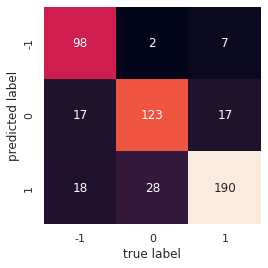

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

# Conclusion
The model is overfitting on the training data as seen by the large variance in the training and testing accuracies. However, it may be possible that do to a lack of data in testing set. Initially when given a testing set of 250 row items, the score the model was being capped out to ~69.0%. However, with a larger testing set of 500 row items, I was able to reach a score of ~80.0%. In the future it would be best to a larger amount data before hand. Using the Twitter API, this would have to be done over a course of a few days do the APIs limitations. But, the Twitter API can be subsituted for SNScrape for a efficient data collection processes.

In addition, this model tends to struggle the most with correctly identifying tweets with a positive sentiment(class 1).

In [ ]:
print('Number of positive sentiment tweets:', df[df['rating'] == 1].shape[0])
print('Number of neutral sentiment tweets:', df[df['rating'] == 0].shape[0])
print('Number of negative sentiment tweets:', df[df['rating'] == -1].shape[0])

Number of positive sentiment tweets: 404
Number of neutral sentiment tweets: 327
Number of negative sentiment tweets: 269


It can be argued that the dataset is umbalanced.

**Note: This data is being loaded 'live' using the Twitter API, so the results will differ they ran on a different day. This can be eaily avoided by simply saving an instance of the data.